In [3]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [9]:
xs = np.arange(2000, 0, -1)
xs

array([2000, 1999, 1998, ...,    3,    2,    1])

In [10]:
percentile(2.5, xs)

50

In [11]:
percentile(97.5, xs)

1950

In [272]:
1900/2000

0.95

In [274]:
percentile(97.49, xs)

1950

In [275]:
percentile(97.51, xs)

1951

## Discussion question

In [4]:
s = [1, 7, 3, 9, 5]

In [8]:
percentile(40, s)

3

In [258]:
tenth = percentile(10)

In [260]:
tenth(np.arange(1, 251))

25

## Resampled Confidence Interval

In [13]:
free_trips = Table.read_table("trip.csv").where('Duration', are.below(1800)).select([3, 6, 1])
free_trips

Start Station,End Station,Duration
Harry Bridges Plaza (Ferry Building),San Francisco Caltrain (Townsend at 4th),765
San Antonio Shopping Center,Mountain View City Hall,1036
Post at Kearny,2nd at South Park,307
San Jose City Hall,San Salvador at 1st,409
Embarcadero at Folsom,Embarcadero at Sansome,789
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),293
Embarcadero at Folsom,Embarcadero at Sansome,896
Embarcadero at Sansome,Steuart at Market,255
Beale at Market,Temporary Transbay Terminal (Howard at Beale),126
Post at Kearny,South Van Ness at Market,932


In [14]:
np.average(free_trips.column('Duration'))

550.00143345658103

In [24]:
n = 100
sample = free_trips.sample(n)
sample

Start Station,End Station,Duration
San Jose Diridon Caltrain Station,Santa Clara at Almaden,194
San Francisco Caltrain 2 (330 Townsend),Market at 10th,723
Yerba Buena Center of the Arts (3rd @ Howard),San Francisco Caltrain (Townsend at 4th),889
Mountain View City Hall,Mountain View Caltrain Station,258
San Francisco Caltrain (Townsend at 4th),Townsend at 7th,294
Mechanics Plaza (Market at Battery),Golden Gate at Polk,788
Embarcadero at Bryant,Embarcadero at Vallejo,451
San Francisco Caltrain (Townsend at 4th),Embarcadero at Bryant,512
Embarcadero at Vallejo,San Francisco Caltrain 2 (330 Townsend),904
Townsend at 7th,Temporary Transbay Terminal (Howard at Beale),822


In [243]:
average = np.average(sample.column(2))
average

536.84000000000003

In [245]:
deviations = Table(['Resample #', 'Deviation'])
for i in np.arange(2000):
    resample = sample.sample(n, with_replacement=True)
    d = average - np.average(resample.column(2))
    deviations.append([i, d])
deviations

Resample #,Deviation
0,-24.95
1,-25.74
2,-5.25
3,21
4,-1.83
5,41.47
6,8.68
7,-27.52
8,3.86
9,-6.95


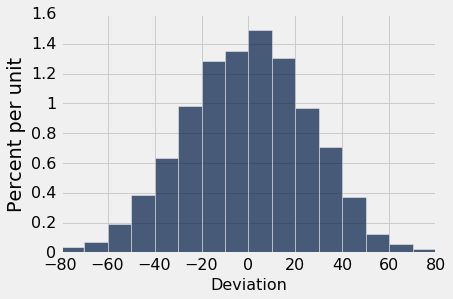

In [135]:
deviations.hist(1, bins=np.arange(-80, 81, 10))

In [238]:
lower = average - percentile(97.5, deviations.column(1))
lower

488.60999999999996

In [240]:
upper = average - percentile(2.5, deviations.column(1))
upper

589.56999999999994

In [241]:
print('A 95% confidence interval:', lower, 'to', upper)

A 95% confidence interval: 488.61 to 589.57


In [300]:
def average_ci(sample, label):
    deviations = Table(['Resample #', 'Deviation'])
    n = sample.num_rows
    average = np.average(sample.column(label))
    for i in np.arange(2000):
        resample = sample.sample(n, with_replacement=True)
        dev = np.average(resample.column(label)) - average
        deviations.append([i, dev])
    return (average - percentile(97.5, deviations.column(1)),
            average - percentile(2.5, deviations.column(1)))

average_ci(sample, 'Duration')

(502.28999999999985, 604.70999999999992)

## Functional Arguments

In [143]:
def means(table, n, label, k):
    results = Table(['Sample #', label])
    for i in np.arange(k):
        sampled_values = table.sample(n).column(label)
        statistic = np.mean(sampled_values)
        results.append([i, statistic])
    return results

In [144]:
means(free_trips, 100, 'Duration', 10)

Sample #,Duration
0,511.13
1,588.25
2,568.13
3,552.47
4,584.64
5,542.8
6,543.8
7,556.49
8,536.42
9,600.17


In [276]:
def stats(table, n, label, k, f):
    results = Table(['Sample #', label])
    for i in np.arange(k):
        sampled_values = table.sample(n).column(label)
        statistic = f(sampled_values)
        results.append([i, statistic])
    return results

In [278]:
stats(free_trips, 100, 'Duration', 10, percentile(50))

Sample #,Duration
0,461
1,479
2,527
3,474
4,529
5,476
6,458
7,444
8,478
9,488


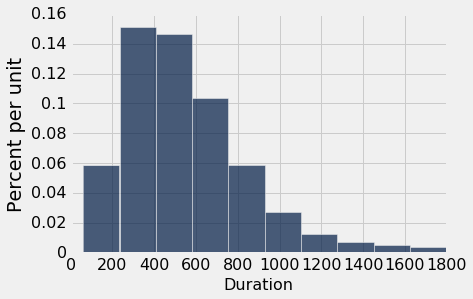

In [113]:
free_trips.hist(2)

In [301]:
def ci(sample, label, f): # confidence interval
    deviations = Table(['Resample #', 'Deviation'])
    n = sample.num_rows
    stat = f(sample.column(label))
    for i in np.arange(400):
        resample = sample.sample(n, with_replacement=True)
        dev = f(resample.column(label)) - stat
        deviations.append([i, dev])
    return (stat - percentile(97.5, deviations.column(1)),
            stat - percentile(2.5, deviations.column(1)))

In [302]:
ci(sample, 'Duration', np.average)

(504.1099999999999, 605.13999999999987)

In [303]:
ci(sample, 'Duration', np.median)

(430.0, 568.5)

In [304]:
ci(sample, 'Duration', percentile(90))

(899, 1074)

In [305]:
ci(free_trips.sample(1000), 'Duration', percentile(90))

(913, 1049)

### Evaluation

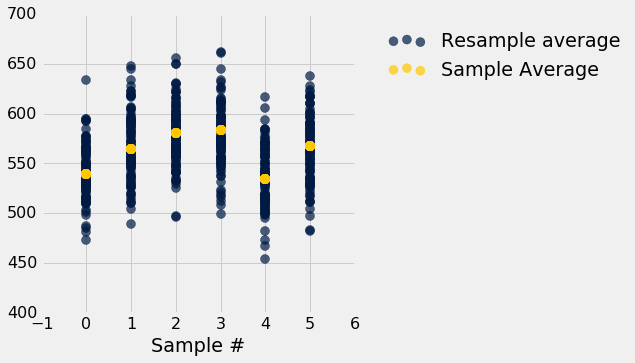

In [226]:
samples = Table(['Sample #', 'Resample average', 'Sample Average'])
for i in np.arange(6):
    sample = free_trips.sample(n)
    average = np.average(sample.column('Duration'))
    for j in np.arange(100):
        resample = sample.sample(n, with_replacement=True)
        resample_average = np.average(resample.column('Duration'))
        samples.append([i, resample_average, average])
samples.scatter(0, s=80)

In [294]:
samples = Table(['Sample #', 'Lower', 'Estimate', 'Upper'])
for i in np.arange(6):
    sample = free_trips.sample(n)
    average = np.average(sample.column('Duration'))
    lower, upper = ci(sample, 'Duration', np.average)
    samples.append([i, lower, average, upper])

In [295]:
samples

Sample #,Lower,Estimate,Upper
0,519.14,582.13,655.85
1,506.54,556.76,619.86
2,478.76,518.96,565.96
3,497,548.59,601.68
4,488.86,539.5,590.97
5,498.66,553.18,602.27


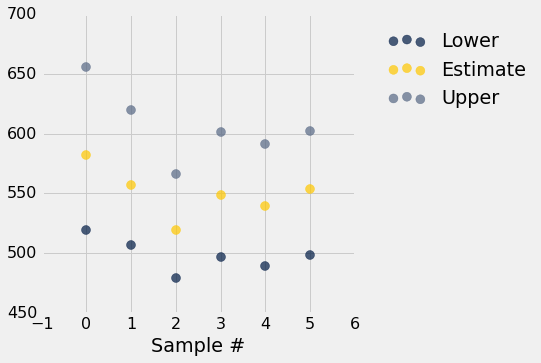

In [296]:
samples.scatter(0, s=80)

In [297]:
correct = np.logical_and(samples.column('Lower') <= 550, samples.column('Upper') >= 550)
np.count_nonzero(correct)

6

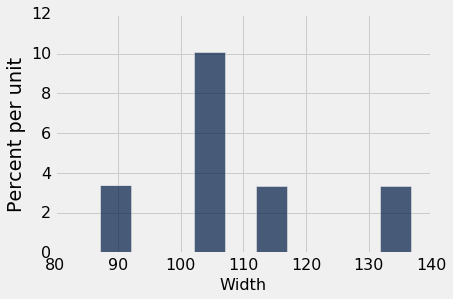

In [298]:
Table().with_column('Width', samples.column('Upper')-samples.column('Lower')).hist(0)